In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
#input

sigma_x= 50
sigma_y= 100
tau_yx= -20

In [32]:
def stress_at_angle(sigma_x, sigma_y, tau_yx, alpha):
    #sigma_x:     normal stress in x direction
    #sigma_y:     normal stress in y direction
    #tau_yx:      shear stress in y direction
    #alpha:       angle of the stress element

    alpha_rad = np.deg2rad(alpha)
    sigma_x_prime = (sigma_x + sigma_y)/2 + (sigma_x - sigma_y)/2 * np.cos(2*alpha_rad) + tau_yx * np.sin(2*alpha_rad)

    tau_xy_prime = (sigma_x - sigma_y)/2 * np.sin(2*alpha_rad) - tau_yx * np.cos(2*alpha_rad)

    return sigma_x_prime, tau_xy_prime

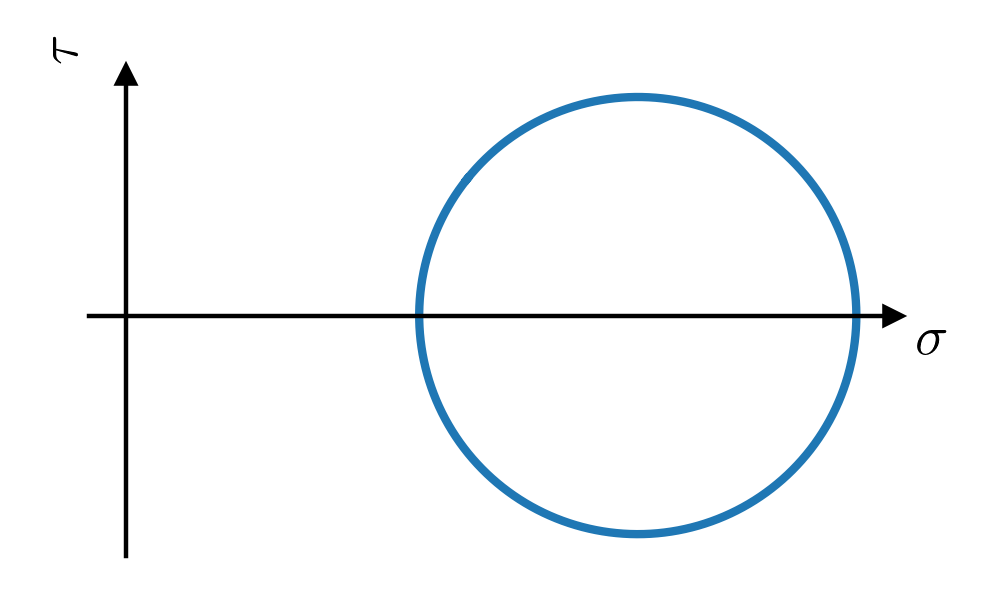

In [84]:
thetas = np.linspace(0, 180, 200)

sigmas, taus = stress_at_angle(sigma_x, sigma_y, tau_yx, thetas)

rc = {"xtick.direction" : "inout", "ytick.direction" : "inout",
      "xtick.major.size" : 5, "ytick.major.size" : 5,}
with plt.rc_context(rc):
    fig, ax = plt.subplots()
    ax.plot(sigmas, taus)
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.gca().xaxis.set_label_coords(1.05, 0.5)
    plt.gca().yaxis.set_label_coords(0, 1.05)

    ax.set_xlabel(r"$\sigma$")
    ax.set_ylabel(r"$\tau$")

    ax.axes.set_aspect('equal')

    #remove ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])


    #set background of image transparent
    ax.set_facecolor('none')

    # Set figure size to 3x3 inches
    fig.set_size_inches(3, 1.5)

    #Set tight layout
    fig.tight_layout()    

    
    # make arrows
    ax.plot((1), (0), ls="", marker=">", ms=3, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot((0), (1), ls="", marker="^", ms=3, color="k",
            transform=ax.get_xaxis_transform(), clip_on=False)
    
    

fig.savefig("stress_element.svg")


